In [5]:
import numpy as np

#lớp tạo đối tượng quảng cáo, nhận đầu vào là xác suất khách hàng nhấn vào quảng cáo
class BernoulliBandit(object):
    def __init__(self, p):
        self.p = p
    def display_ad(self):
        reward = np.random.binomial(n=1, p=self.p)
        return reward

adA = BernoulliBandit(0.004)
adB = BernoulliBandit(0.016)
adC = BernoulliBandit(0.02)
adD = BernoulliBandit(0.028)
adE = BernoulliBandit(0.031)
ads = [adA, adB, adC, adD, adE]

n_prod = 100000
n_ads = len(ads)

In [9]:
def UCB(c):
    ad_indices = np.array(range(n_ads))
    Q = np.zeros(n_ads)
    N = np.zeros(n_ads)
    total_reward = 0
    avg_rewards = []
    for t in range(1, n_prod + 1):
        if any(N==0):
            ad_chosen = np.random.choice(ad_indices[N==0])
        else:
            uncertainty = np.sqrt(np.log(t) / N)
            ad_chosen = np.argmax(Q + c * uncertainty)
        R = ads[ad_chosen].display_ad()
        N[ad_chosen] += 1
        Q[ad_chosen] += (1 / N[ad_chosen]) * (R - Q[ad_chosen])
        total_reward += R
        avg_reward_so_far = total_reward / t
        avg_rewards.append(avg_reward_so_far)
    return avg_rewards

In [10]:
import pandas as pd
df_reward_comparison = pd.DataFrame()
for c in [0.1,1,10]:
    df_reward_comparison['UCB, c={}'.format(c)] = UCB(c)

<AxesSubplot:title={'center':'Action Selection using UCB. Best avg. reward: 0.0313'}>

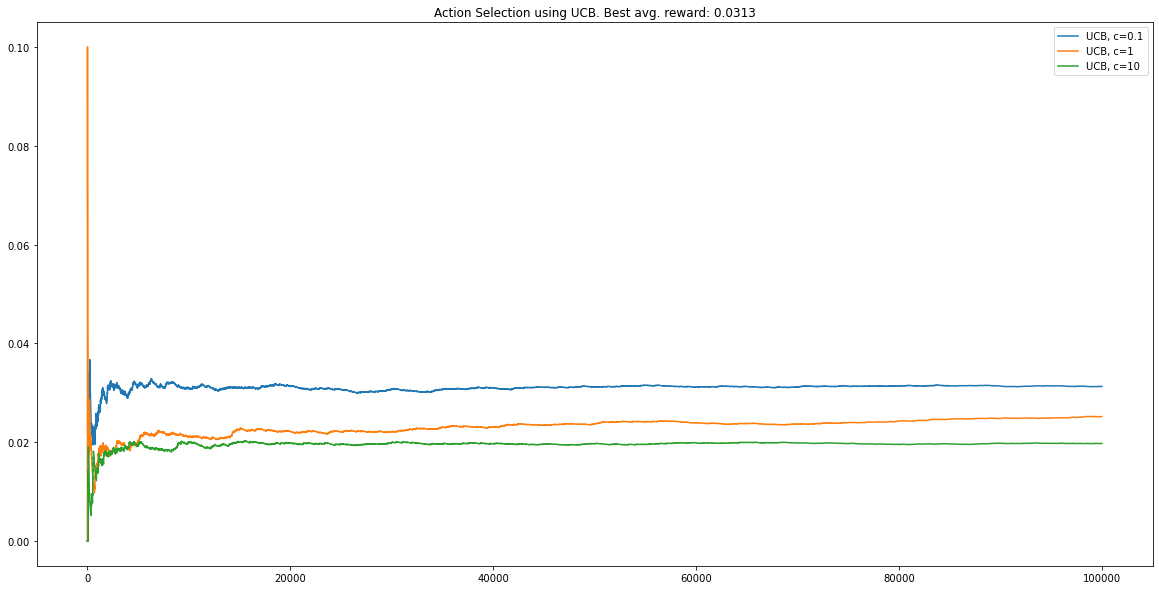

In [12]:
import cufflinks as cf
import plotly.offline

ucb_list = ['UCB, c=0.1', 'UCB, c=1', 'UCB, c=10']
# print(df_reward_comparison)
best_reward = df_reward_comparison.loc[n_prod-1, ucb_list].max()
# print(best_reward)
df_reward_comparison[ucb_list].plot(title='Action Selection using UCB. Best avg. reward: {:.4f}'.format(best_reward), figsize =(20,10))